In [ ]:
# House price prediction- Supervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'D:\HousePrice_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<AxesSubplot:>

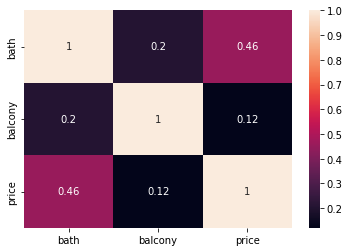

In [3]:
sns.heatmap(df.corr(), annot = True)

In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.shape

(13320, 9)

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df1 = df.drop(['area_type', 'availability', 'society','balcony'],axis=1)
df1.shape

(13320, 5)

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.shape

(13246, 5)

In [11]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [12]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
df2['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [15]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df2.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
# print(is_float(2+3))

True


In [19]:
# print(is_float('n'+'s'))

False


In [20]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def total_sqft_to_num(val):
    divide = val.split('-')
    if len(divide) > 2:
        return (float(divide[0] + divide[1]))/2
    try:
        return float(val)
    except:
        return None

In [22]:
df3 = df2.copy()

In [23]:
df3['total_sqft'] = df3['total_sqft'].apply(total_sqft_to_num)
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [24]:
df3.isnull().sum()

location        0
size            0
total_sqft    190
bath            0
price           0
bhk             0
dtype: int64

In [25]:
df4 = df3[df3['total_sqft'].notnull()]
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [26]:
df4.shape

(13056, 6)

In [27]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [27]:
df5 = df4.copy()
df5.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [28]:
df5.loc[1]

location      Chikka Tirupathi
size                 4 Bedroom
total_sqft              2600.0
bath                       5.0
price                    120.0
bhk                          4
Name: 1, dtype: object

In [29]:
df5['price_per_sqft'] = df5['price']*100000/ df5['total_sqft']
df5.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [30]:
df5['location'].value_counts(ascending=False)

Whitefield                   517
Sarjapur  Road               386
Electronic City              302
Kanakpura Road               260
Thanisandra                  222
                            ... 
Rajanna Layout                 1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Sir M V Nagar                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [31]:
df5['location'] = df5['location'].apply(lambda x : x.strip())

In [32]:
loc_vals = df5['location'].value_counts(ascending=False)

location_less_than_10 = loc_vals[loc_vals<= 10]

In [33]:
len(df5['location'].unique())

1287

In [34]:
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_less_than_10 else x)
df5['location'].nunique()

240

In [35]:
df5.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [36]:
# Outliers removal- domain knowledge like 1 BHK  > 300 

In [37]:
df5[df5['total_sqft']/df5['bhk'] < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [38]:
df6 = df5[~(df5['total_sqft']/df5['bhk'] < 300)]
df6.shape

(12312, 7)

In [39]:
df6.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000
mean,1589.702335,2.562135,111.421129,2.651966,6323.403514
std,1261.895153,1.073093,152.771439,0.973438,4187.211055
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1118.000000,2.000000,49.382500,2.000000,4208.545855
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6938.987948
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [40]:
def remove_outlier(df):
    new_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        
        reduced_df = subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        
        new_df = pd.concat([new_df,reduced_df],ignore_index=True)
    return new_df

In [41]:
df7 = remove_outlier(df6)
df7.shape

(10146, 7)

In [42]:
df7['location'].value_counts()

other                   2311
Whitefield               466
Sarjapur  Road           293
Electronic City          279
Kanakpura Road           187
                        ... 
Vishveshwarya Layout       4
Vishwapriya Layout         4
Banjara Layout             4
HAL 2nd Stage              4
Marsur                     3
Name: location, Length: 240, dtype: int64

In [43]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

import matplotlib

def plot_scatter(df, loc):
    bhk2 = df[(df['location']==loc) & (df['bhk']==2)]
    bhk3 = df[(df['location']==loc) & (df['bhk']==3)]
    
    py.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2 BHK', s=50)
    py.scatter(bhk3['total_sqft'], bhk3['price'], marker= '*' ,color = 'red', label = '3 BHK', s=50)
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    py.xlabel("Total Square Feet Area")
    py.ylabel("Price (Lakh Indian Rupees)")
    py.title(loc)
    py.legend()

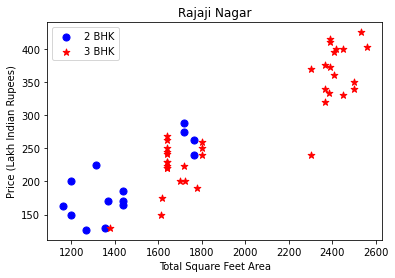

In [44]:
plot_scatter(df7, 'Rajaji Nagar')

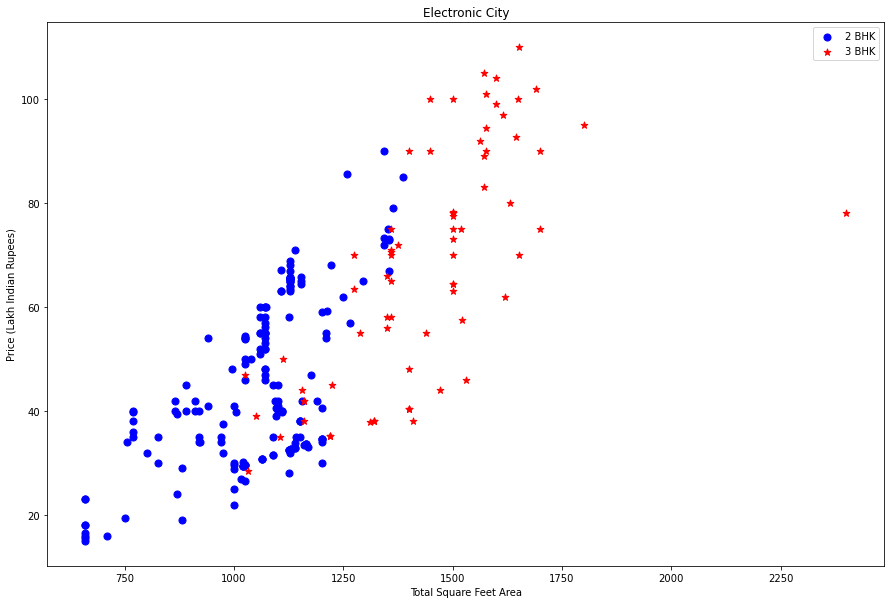

In [45]:
plot_scatter(df7,"Electronic City")

In [46]:
# We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less 
                                                                                                    # than 2 bedroom apartment

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7206, 7)

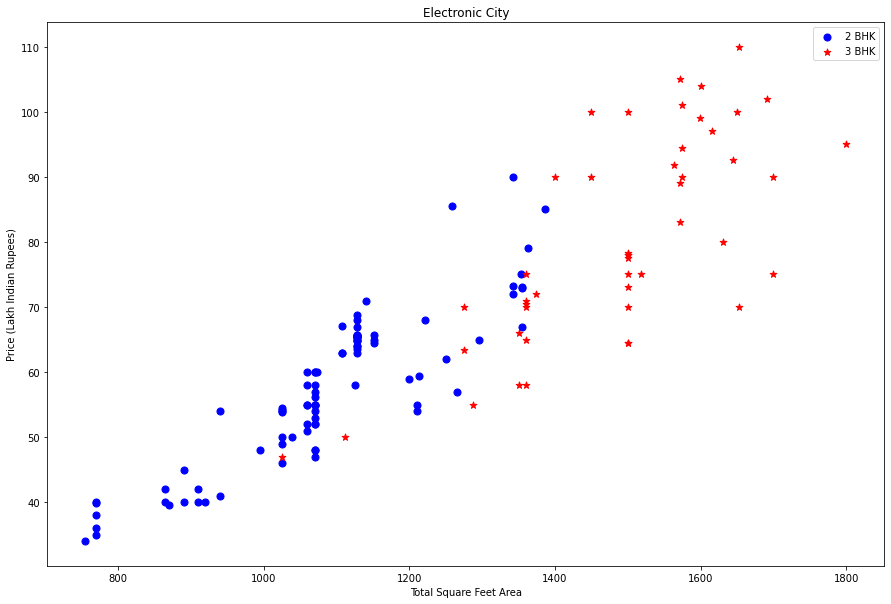

In [48]:
plot_scatter(df8,"Electronic City")

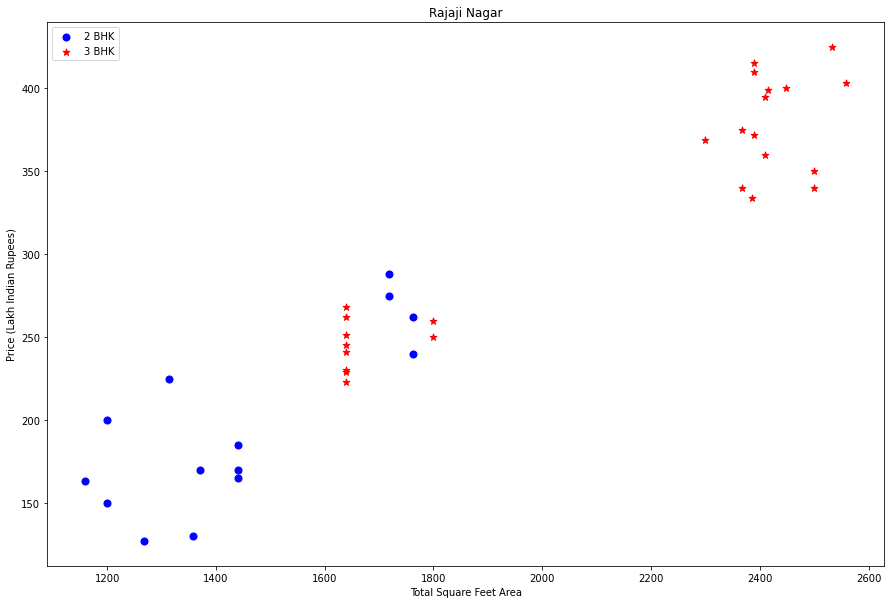

In [49]:
plot_scatter(df8, 'Rajaji Nagar')

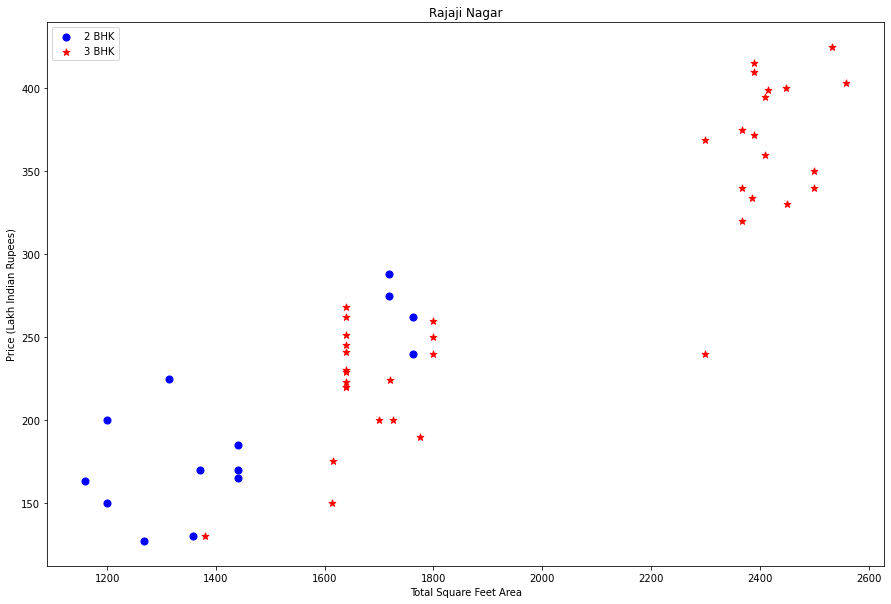

In [50]:
# before

plot_scatter(df7, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

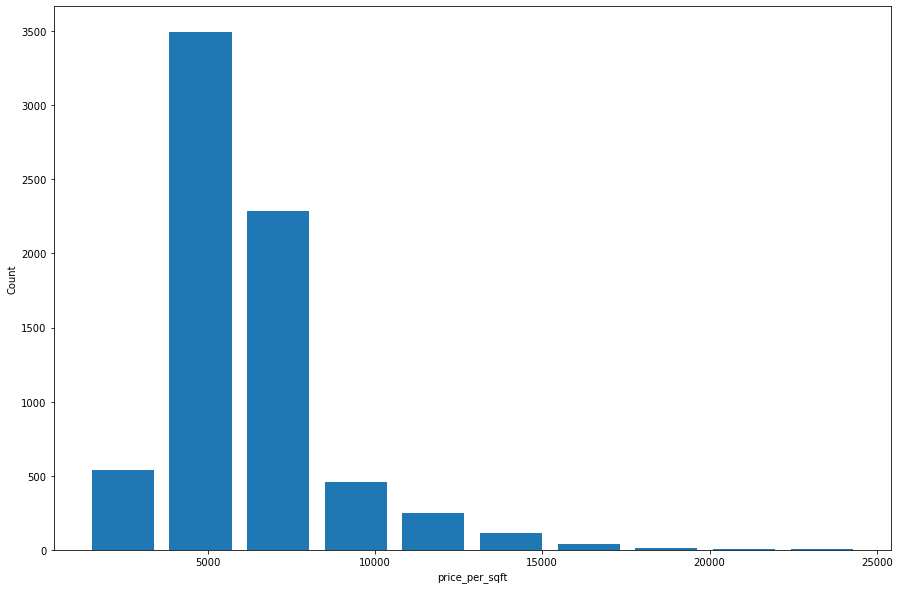

In [51]:
py.hist(df8['price_per_sqft'], rwidth=0.8)
py.xlabel('price_per_sqft')
py.ylabel('Count')

In [52]:
df8.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [53]:
# removing outliers using Bath

In [54]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

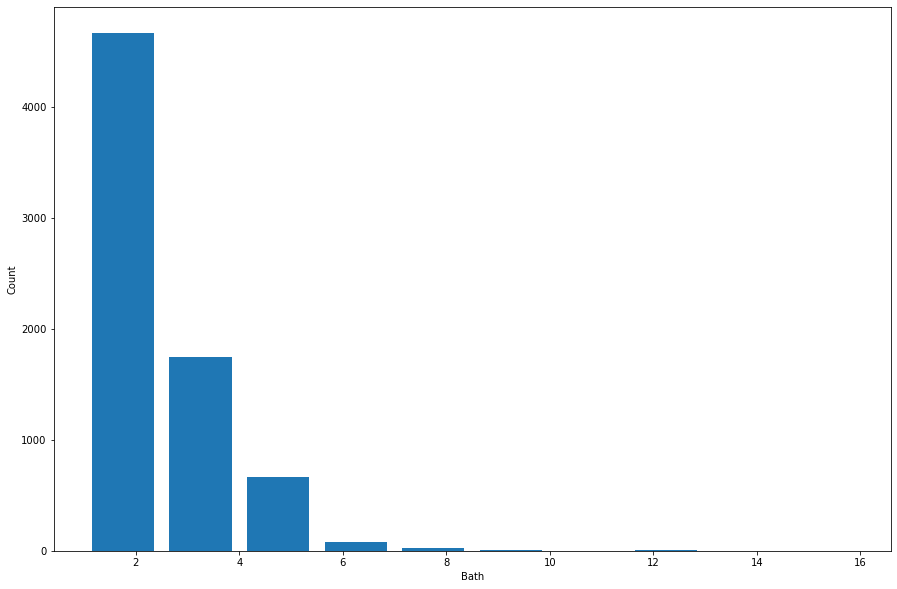

In [55]:
py.hist(df8['bath'], rwidth=0.8)
py.xlabel('Bath')
py.ylabel('Count')

In [56]:
df9 = df8[df8['bath'] < df8['bhk']+2]
df9.shape

(7133, 7)

In [57]:
df10 = df9.drop(['size','price_per_sqft'], axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [58]:
dummy_val = pd.get_dummies(df10['location'])
dummy_val.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df11 = pd.concat([df10, dummy_val.drop('other', axis=1)], axis=1)
df11.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df12 = df11.drop('location',axis= 1)
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# BUILDING A MODEL

In [62]:
x = df12.drop('price', axis=1)
y = df12['price']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [64]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.8087475354524994

In [65]:
# Using K-Fold

In [66]:
cv = cross_val_score(LinearRegression(), X_train, y_train , cv=5)
cv

array([0.84810277, 0.86899188, 0.78258174, 0.82649211, 0.83682651])

In [67]:
# finding the best model using Grid Search CV/ Parameter Tuning

In [74]:
def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize': [True, False]
            }
        },
        
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [0.001, 0.01, 0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        
        'Ridge' : {
            'model' : Ridge(),
            'params' : {
                'alpha' : [0.001, 0.01, 0.1, 1, 10]
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'max_depth' : [1,2,5,10], 
            }
        },
          
        'random_forest' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [20,50,100]
                
            }
        }
    }
    
    scores = []
    for algo_name, model in algos.items():
        gs = GridSearchCV(model['model'], model['params'], cv = 5 )
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [75]:
find_best_model(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.832599,{'normalize': False}
1,lasso,0.832653,"{'alpha': 0.001, 'selection': 'cyclic'}"
2,Ridge,0.833177,{'alpha': 0.1}
3,decision_tree,0.758852,"{'criterion': 'friedman_mse', 'max_depth': 10}"
4,random_forest,0.779761,{'n_estimators': 100}


In [76]:
pred_res = linear_model.predict(X_test)

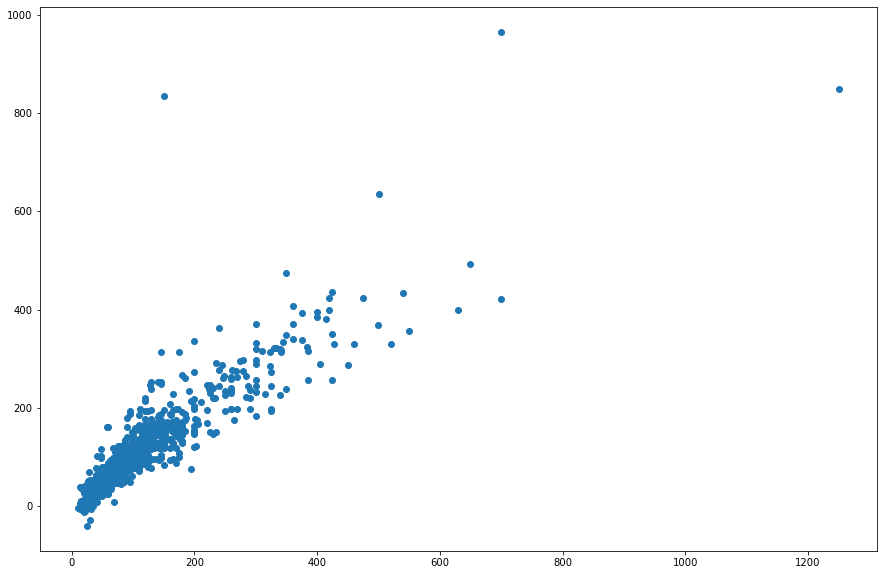

In [77]:
py.scatter(y_test, pred_res)

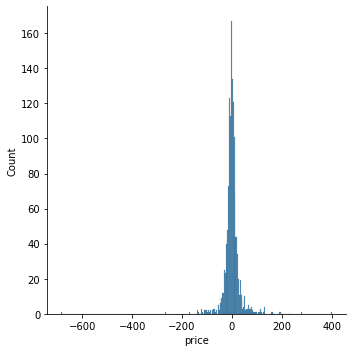

In [78]:
sns.displot((y_test- pred_res))

In [79]:
# checking the r2 score

from sklearn.metrics import r2_score

r2_score = r2_score(y_test, pred_res)
r2_score

0.8087475354524994

In [80]:
# Export the model to a pickle file

import pickle

with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(linear_model, f)